# 1.1 - Series Temporales

![time_series](images/time_series.jpg)

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import pylab as plt

In [2]:
df=pd.read_csv('../data/occupancy.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2664 non-null   object 
 1   Temperature    2664 non-null   float64
 2   Humidity       2664 non-null   float64
 3   Light          2664 non-null   float64
 4   CO2            2664 non-null   float64
 5   HumidityRatio  2664 non-null   float64
 6   Occupancy      2664 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.8+ KB


In [4]:
df['datetime']=pd.to_datetime(df.date)
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1,2015-02-02 14:00:00
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1,2015-02-02 15:00:00
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1,2015-02-02 16:00:00
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1,2015-02-02 17:00:00
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1,2015-02-02 18:00:00


In [5]:
df=df.set_index('datetime')
df.drop(columns=['date'], inplace=True)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
datetime,,,,,,
2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


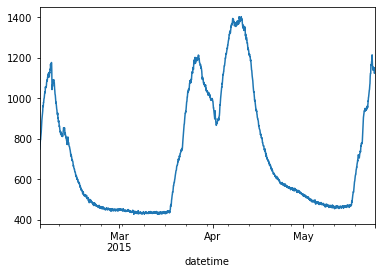

In [6]:
df.CO2.plot();

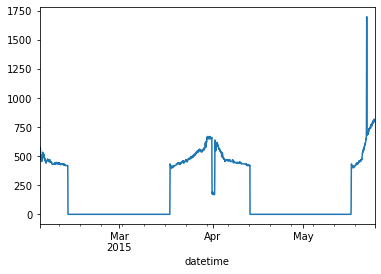

In [7]:
df.Light.plot();

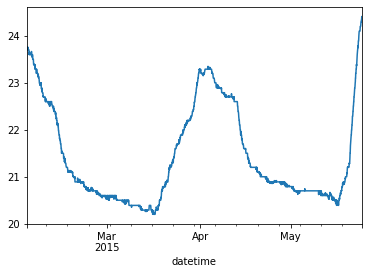

In [8]:
df.Temperature.plot();

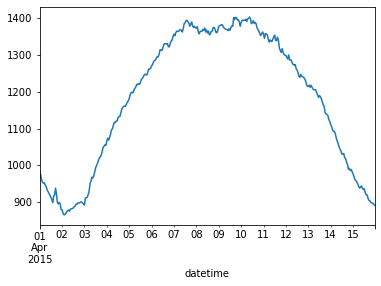

In [9]:
dias=df.CO2.loc['2015-4-1' : '2015-4-15']
dias.plot();

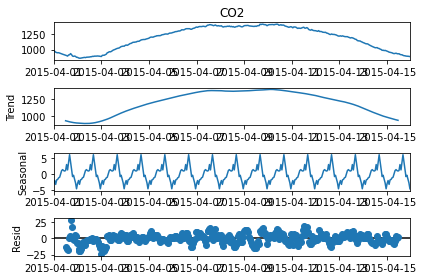

In [10]:
import statsmodels.api as sm

res=sm.tsa.seasonal_decompose(dias)

resplot=res.plot()

### Autoregresión - AR

El modelo usa la relación de dependencia del momento actual con $n$ momentos anteriores. Es, en realidad, una regresión lineal.

$$y_t = \beta_0+\beta_1y_{t-1}+\beta_2y_{t-2}+\ldots+\beta_ny_{t-n}+\epsilon_t$$

Si solamente nos fijamos en el momento anterior, $t-1$, entonces:

$$y_t = \beta_0+\beta_1y_{t-1}+\epsilon_t$$

Es la llamada Cadena de Markov

In [11]:
from pandas.plotting import lag_plot

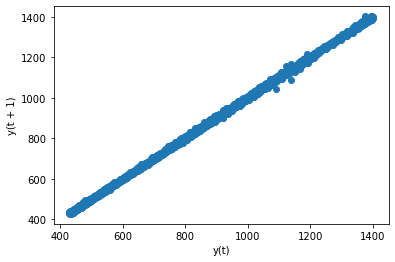

In [12]:
lag_plot(df.CO2);

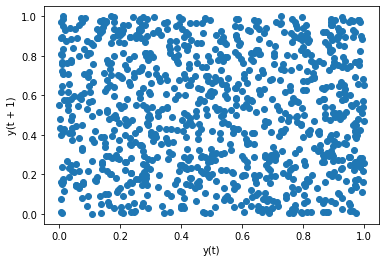

In [13]:
lag_plot(pd.Series(np.random.random(1000)));

In [14]:
# AR
from statsmodels.tsa.ar_model import AutoReg as AR

In [15]:
train, test = df.CO2[:-10], df.CO2[-10:]

In [16]:
modelo=AR(train, lags=1).fit()

2022-05-09 11:13:39,937 [51073] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/miniforge3/envs/clase/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)



In [17]:
pred=modelo.predict(len(train), len(df.CO2)-1)

error=(pred-test).abs().sum()/len(pred)

error  # error medio absoluto

15.016314895077766

In [18]:
res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

,real,pred,diff
2015-05-24 04:00:00,1153.250000,1152.762619,-0.487381
2015-05-24 05:00:00,1152.400000,1153.025305,0.625305
2015-05-24 06:00:00,1146.166667,1153.288058,7.121391
2015-05-24 07:00:00,1145.400000,1153.550877,8.150877
2015-05-24 08:00:00,1140.800000,1153.813763,13.013763
2015-05-24 09:00:00,1150.250000,1154.076715,3.826715
2015-05-24 10:00:00,1129.200000,1154.339734,25.139734
2015-05-24 11:00:00,1125.800000,1154.602820,28.802820
2015-05-24 12:00:00,1123.000000,1154.865972,31.865972
2015-05-24 13:00:00,1124.000000,1155.129191,31.129191


In [19]:
import warnings
warnings.simplefilter('ignore')

for i in range(1, 100, 10):
    modelo=AR(train, lags=i).fit()                     # entrenar la AR
    pred=modelo.predict(len(train), len(df.CO2)-1)     # la prediccion en el intervalo
    error=(pred-test).abs().sum()/len(pred)            # error medio absoluto
    print ('Error mae: ', error.round(5), '  Maxlag : ', i)

Error mae:  15.01631   Maxlag :  1
Error mae:  7.62306   Maxlag :  11
Error mae:  9.74234   Maxlag :  21
Error mae:  15.08766   Maxlag :  31
Error mae:  15.34875   Maxlag :  41
Error mae:  15.45762   Maxlag :  51
Error mae:  13.6233   Maxlag :  61
Error mae:  12.72821   Maxlag :  71
Error mae:  11.96847   Maxlag :  81
Error mae:  13.54291   Maxlag :  91


### Media Móvil (Moving Average MA)

Una manera matemática de expresar la MA puede ser:

$$y_t = \beta_0+\epsilon_t+\epsilon_{t-1}\phi_{t-1}+\epsilon_{t-2}\phi_{t-2}+\ldots+\epsilon_{t-n}\phi_{t-n}$$


Se usa la relación entre las observaciones y el error residual de la media móvil.

Otra es la evidente, la media móvil, se muestra en el gráfico.

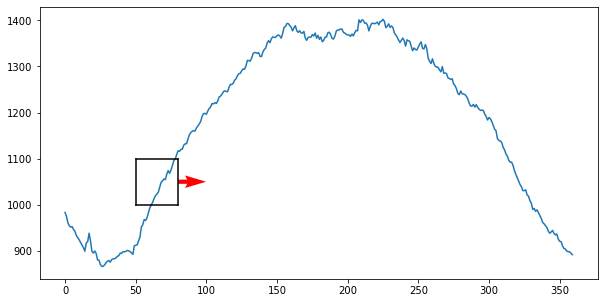

In [20]:
plt.figure(figsize=(10, 5))

plt.plot(dias.values)

plt.plot([50, 80],[1000, 1000], color='black')
plt.plot([50, 50],[1000, 1100], color='black')
plt.plot([50, 80],[1100, 1100], color='black')
plt.plot([80, 80],[1000, 1100], color='black')

plt.quiver(80, 1050, 1, 0, scale=20, color='r');

### ARMA (AutoRegressive Moving Average)

Unión de ambos conceptos.

$$y_t = \beta_0 + \epsilon_t + \sum_{i=1}^{n}\beta_iy_{t-i} + \sum_{i=1}^{m}\phi_i\epsilon_{t-i}$$

In [21]:
# ARIMA  order==> (p, d, q)  d=>Integrated , d=0 es ARMA

# ARMA  order==> p=>AR (n, maxlag), q=>MA (m, ancho de la ventana)

from statsmodels.tsa.arima.model import ARIMA

In [24]:
%%time

modelo=ARIMA(train, order=(4, 0, 3)).fit()

CPU times: user 5.72 s, sys: 1.54 s, total: 7.26 s
Wall time: 1.58 s


In [25]:
pred=modelo.predict(len(train), len(df.CO2)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)

res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

Error mae:  16.61193678569598


,real,pred,diff
2015-05-24 04:00:00,1153.250000,1153.052992,-0.197008
2015-05-24 05:00:00,1152.400000,1153.740905,1.340905
2015-05-24 06:00:00,1146.166667,1154.244207,8.077540
2015-05-24 07:00:00,1145.400000,1154.881115,9.481115
2015-05-24 08:00:00,1140.800000,1155.389978,14.589978
2015-05-24 09:00:00,1150.250000,1155.933115,5.683115
2015-05-24 10:00:00,1129.200000,1156.476354,27.276354
2015-05-24 11:00:00,1125.800000,1156.921359,31.121359
2015-05-24 12:00:00,1123.000000,1157.483670,34.483670
2015-05-24 13:00:00,1124.000000,1157.868323,33.868323


In [26]:
#help(ARIMA)

### ARIMA (AutoRegressive Integrated Moving Average)

Lo de Integrated trata de hacer la serie temporal estacionaria, similar al concepto de PID.

In [27]:
%%time

modelo=ARIMA(train, order=(4, 1, 2)).fit()

                     
pred=modelo.predict(len(train), len(df.CO2)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

Error mae:  17.33208608482107
CPU times: user 1.49 s, sys: 1.38 s, total: 2.87 s
Wall time: 488 ms


,real,pred,diff
2015-05-24 04:00:00,1153.250000,1153.285761,0.035761
2015-05-24 05:00:00,1152.400000,1153.607865,1.207865
2015-05-24 06:00:00,1146.166667,1154.459560,8.292893
2015-05-24 07:00:00,1145.400000,1155.189745,9.789745
2015-05-24 08:00:00,1140.800000,1156.021367,15.221367
2015-05-24 09:00:00,1150.250000,1156.710475,6.460475
2015-05-24 10:00:00,1129.200000,1157.501011,28.301011
2015-05-24 11:00:00,1125.800000,1158.197106,32.397106
2015-05-24 12:00:00,1123.000000,1158.960983,35.960983
2015-05-24 13:00:00,1124.000000,1159.653655,35.653655


### ADF-test (testeo de la estacionaridad)

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

### SARIMA (Seasonal AutoRegressive Integrated Moving Average)
Arima por estaciones.

### SARIMAX (Seasonal AutoRegressive Integrated Moving Average Exogenous)
SARIMA con regresores exógenos.

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
%%time

modelo=SARIMAX(endog=train, 
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(4, 1, 5, 2) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(train), len(df.CO2)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

Error mae:  23.71677690108377
CPU times: user 14.7 s, sys: 22.9 s, total: 37.6 s
Wall time: 5 s


,real,pred,diff
2015-05-24 04:00:00,1153.250000,1155.944783,2.694783
2015-05-24 05:00:00,1152.400000,1155.687332,3.287332
2015-05-24 06:00:00,1146.166667,1159.952051,13.785384
2015-05-24 07:00:00,1145.400000,1159.650394,14.250394
2015-05-24 08:00:00,1140.800000,1163.182482,22.382482
2015-05-24 09:00:00,1150.250000,1162.561503,12.311503
2015-05-24 10:00:00,1129.200000,1165.790653,36.590653
2015-05-24 11:00:00,1125.800000,1165.587561,39.787561
2015-05-24 12:00:00,1123.000000,1169.748092,46.748092
2015-05-24 13:00:00,1124.000000,1169.329586,45.329586


## FB-Prophet

https://facebook.github.io/prophet/docs/quick_start.html

In [30]:
#!pip install fbprophet
#!conda install -c conda-forge fbprophet

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from fbprophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')

In [32]:
# datos, consumo de energia

pjme=pd.read_csv('../data/PJME_hourly.csv', index_col=[0], parse_dates=[0])
pjme.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


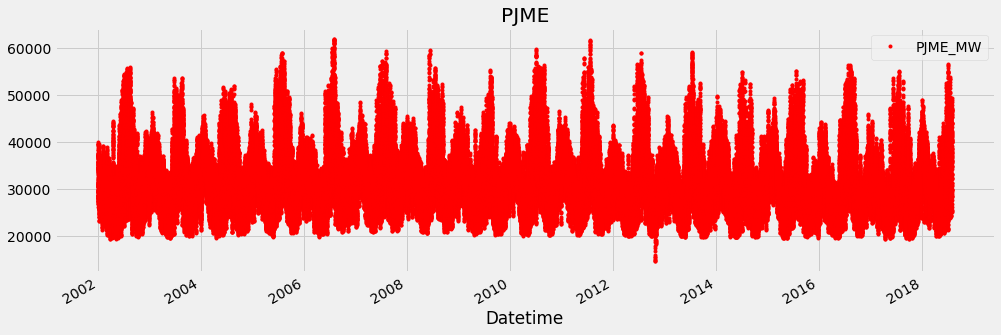

In [33]:
_=pjme.plot(style='.', figsize=(15, 5), color='r', title='PJME')

In [34]:
# se definen las caracteristicas temporales

def features(df, label):
    df=df.copy()
    df['date']=df.index
    df['hour']=df.date.dt.hour
    df['day_of_week']=df.date.dt.dayofweek
    df['quarter']=df.date.dt.quarter
    df['month']=df.date.dt.month
    df['year']=df.date.dt.year
    df['day_of_year']=df.date.dt.dayofyear
    df['day_of_month']=df.date.dt.day
    df['week_of_year']=df.date.dt.weekofyear
    
    X=df[['hour', 'day_of_week', 'quarter', 'month', 'year',
          'day_of_year', 'day_of_month', 'week_of_year']]
    y=df[label]
    
    return X,y

In [35]:
X, y = features(pjme, 'PJME_MW')

data=pd.concat([X, y], axis=1)

data.head()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,PJME_MW
Datetime,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0


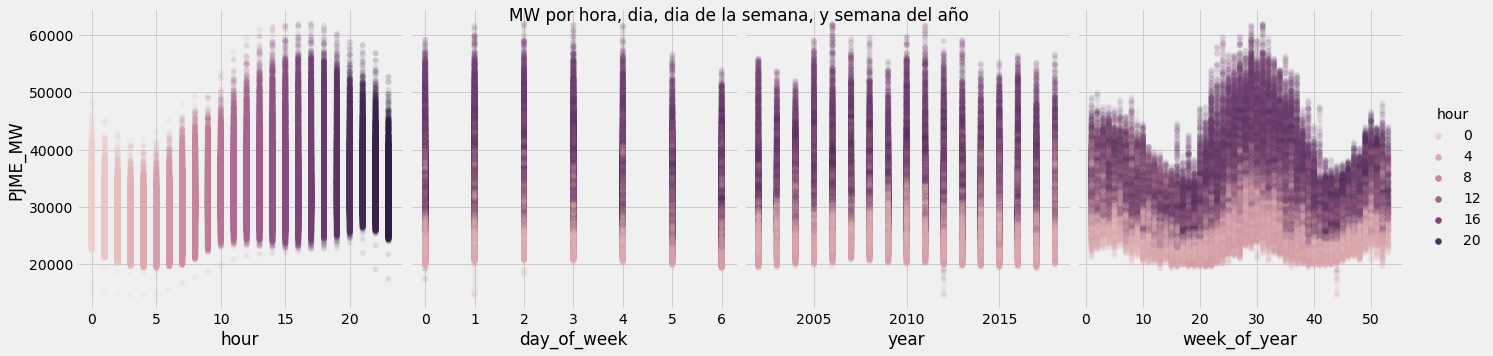

In [36]:
sns.pairplot(data.dropna(), hue='hour', 
            x_vars=['hour', 'day_of_week', 'year', 'week_of_year'],
            y_vars='PJME_MW', height=5, plot_kws={'alpha':0.1, 'linewidth':0})

plt.suptitle('MW por hora, dia, dia de la semana, y semana del año')
plt.show();

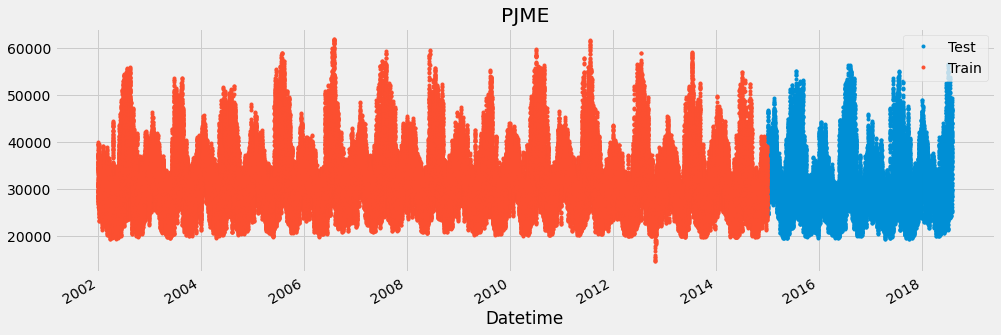

In [37]:
split_date='01-Jan-2015'

train=pjme.loc[pjme.index<=split_date].copy()
test=pjme.loc[pjme.index>split_date].copy()

_=test.rename(columns={'PJME_MW': 'Test'})\
      .join(train.rename(columns={'PJME_MW': 'Train'}), how='outer')\
      .plot(figsize=(15,5), title='PJME', style='.')

In [38]:
# modelo

train=train.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})
test=test.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})
train.head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [39]:
%%time
modelo=Prophet().fit(train)

pred=modelo.predict(test)

Initial log joint probability = -636.327
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        268525    0.00314809       4984.14      0.4578      0.4578      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        268731     0.0130821       7603.67           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        269055    0.00382109       6198.26           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        269246     0.0328589       2489.44           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        269369    0.00397031        2928.6           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

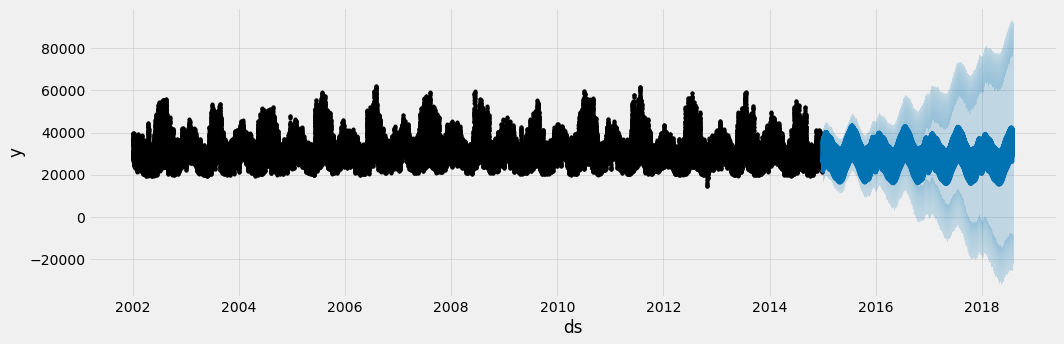

In [48]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

fig=modelo.plot(pred, ax=ax)

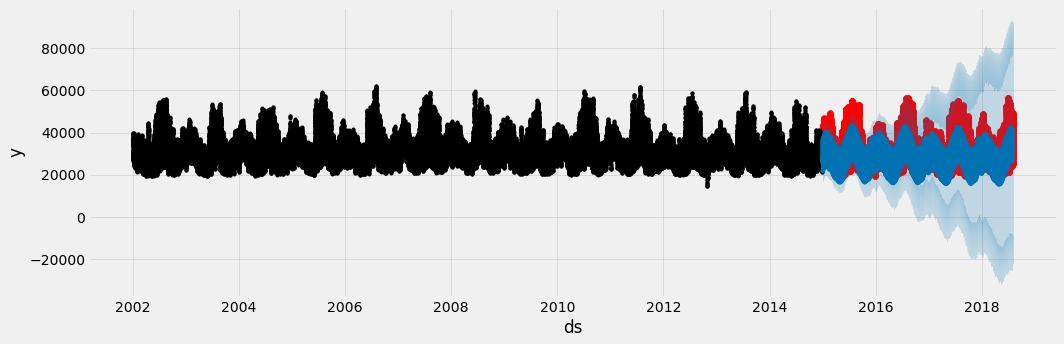

In [49]:
# comparando

f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig=modelo.plot(pred, ax)

In [42]:
# metricas de error

mean_squared_error(test.y, pred.yhat)**0.5

6614.505986459738

In [43]:
mean_absolute_error(test.y, pred.yhat)

5181.991115528178

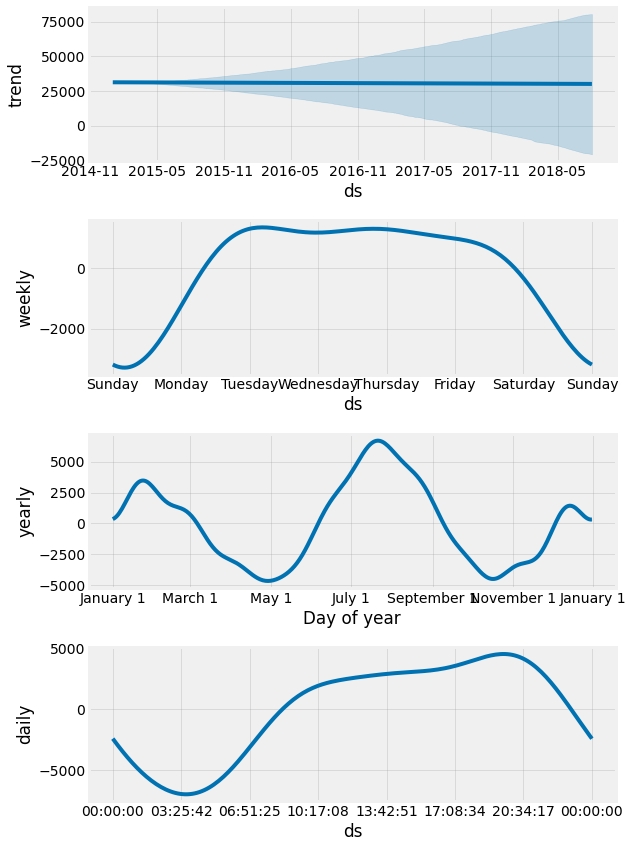

In [44]:
fig = modelo.plot_components(pred)

In [45]:
# Con vacaciones

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
train_h = cal.holidays(train.index.min(), train.index.max())
test_h = cal.holidays(test.index.min(), test.index.max())

In [46]:
pjme['date'] = pjme.index.date
pjme['is_holiday'] = pjme.date.isin([d.date() for d in cal.holidays()])

df_h = pjme.loc[pjme['is_holiday']].reset_index().rename(columns={'Datetime':'ds'})

df_h['holiday'] = 'USFederalHoliday'
df_h = df_h.drop(['PJME_MW','date','is_holiday'], axis=1)

df_h.head()

,ds,holiday
0,2003-01-01 00:00:00,USFederalHoliday
1,2002-12-25 01:00:00,USFederalHoliday
2,2002-12-25 02:00:00,USFederalHoliday
3,2002-12-25 03:00:00,USFederalHoliday
4,2002-12-25 04:00:00,USFederalHoliday


Initial log joint probability = -636.327
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        268869   0.000657869       5380.38           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        269155    0.00628582       11388.4           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        269471    0.00269279       8642.89      0.5382      0.5382      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        269606    0.00457303       1348.51           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        269837     0.0045283       7811.12           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha  

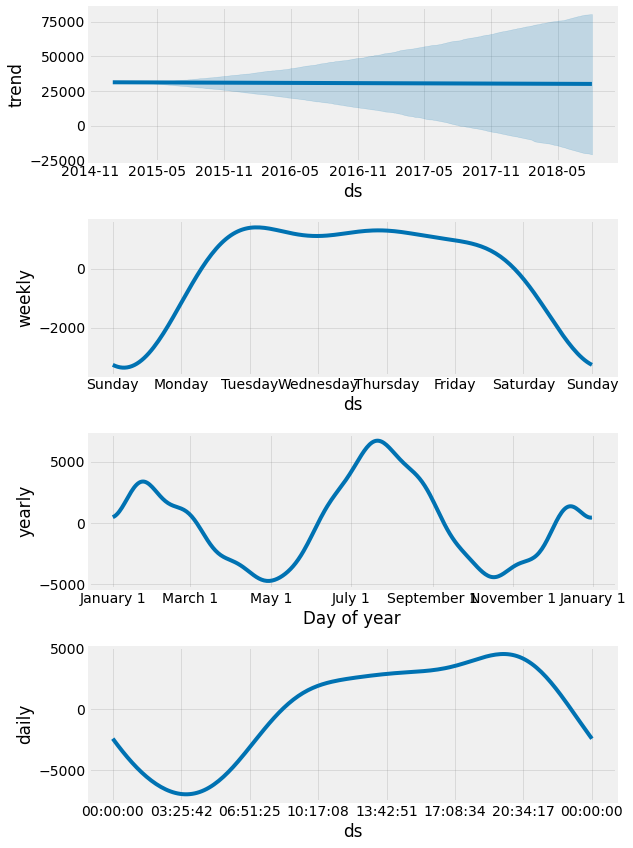

In [50]:
modelo_h=Prophet(holidays=df_h).fit(train)

fig2=modelo_h.plot_components(pred)

In [51]:
pred_h=modelo.predict(test)
pred_h.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31212.826911,24204.873855,33439.486389,31212.826911,31212.826911,-2811.104205,-2811.104205,-2811.104205,-4430.260016,...,1281.423165,1281.423165,1281.423165,337.732646,337.732646,337.732646,0.0,0.0,0.0,28401.722706
1,2015-01-01 02:00:00,31212.789446,22661.118667,31768.494834,31212.789446,31212.789446,-4315.406418,-4315.406418,-4315.406418,-5927.141488,...,1272.662672,1272.662672,1272.662672,339.072398,339.072398,339.072398,0.0,0.0,0.0,26897.383028
2,2015-01-01 03:00:00,31212.751981,21361.472267,30152.232104,31212.751981,31212.751981,-5187.049890,-5187.049890,-5187.049890,-6790.200078,...,1262.696586,1262.696586,1262.696586,340.453601,340.453601,340.453601,0.0,0.0,0.0,26025.702091
3,2015-01-01 04:00:00,31212.714517,21649.021017,30454.228266,31212.714517,31212.714517,-5328.565905,-5328.565905,-5328.565905,-6922.090702,...,1251.648515,1251.648515,1251.648515,341.876282,341.876282,341.876282,0.0,0.0,0.0,25884.148611
4,2015-01-01 05:00:00,31212.677052,21903.993795,30950.935930,31212.677052,31212.677052,-4654.206692,-4654.206692,-4654.206692,-6237.201429,...,1239.654272,1239.654272,1239.654272,343.340465,343.340465,343.340465,0.0,0.0,0.0,26558.470359


In [52]:
mean_squared_error(test.y, pred_h.yhat, squared=False)

6614.505986459738

In [53]:
mean_absolute_error(test.y, pred_h.yhat)

5181.991115528178

In [54]:
#!pip install yfinance

In [55]:
import pandas as pd
import yfinance as yf

import time

In [56]:
data=yf.download(tickers='UBER', period='5d', interval='1m')

data['datetime']=data.index

data.to_dict(orient='records')[-1]

[*********************100%***********************]  1 of 1 completed


{'Open': 26.06999969482422,
 'High': 26.06999969482422,
 'Low': 26.06999969482422,
 'Close': 26.06999969482422,
 'Adj Close': 26.06999969482422,
 'Volume': 0,
 'datetime': Timestamp('2022-05-06 16:00:00-0400', tz='America/New_York')}

In [57]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,datetime
Datetime,,,,,,,
2022-05-02 09:30:00-04:00,31.070000,31.070000,31.059999,31.059999,31.059999,400492,2022-05-02 09:30:00-04:00
2022-05-02 09:31:00-04:00,31.040899,31.070000,30.969999,31.020000,31.020000,95770,2022-05-02 09:31:00-04:00
2022-05-02 09:32:00-04:00,31.010000,31.080000,30.846001,31.070000,31.070000,143322,2022-05-02 09:32:00-04:00
2022-05-02 09:33:00-04:00,31.059999,31.190001,30.750000,30.750000,30.750000,179513,2022-05-02 09:33:00-04:00
2022-05-02 09:34:00-04:00,30.760000,31.209999,30.730000,30.809999,30.809999,136437,2022-05-02 09:34:00-04:00


In [58]:
data=yf.download(tickers='^DJI', period='5d', interval='1m')

data['datetime']=data.index

data.to_dict(orient='records')[-1]

[*********************100%***********************]  1 of 1 completed


{'Open': 32899.37109375,
 'High': 32899.37109375,
 'Low': 32899.37109375,
 'Close': 32899.37109375,
 'Adj Close': 32899.37109375,
 'Volume': 0,
 'datetime': Timestamp('2022-05-06 16:00:00-0400', tz='America/New_York')}

In [59]:
data=yf.download(tickers='^IBEX', period='5d', interval='1m')

data['datetime']=data.index

data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,datetime
Datetime,,,,,,,
2022-05-09 11:34:00+02:00,8277.799805,8277.799805,8274.700195,8274.700195,8274.700195,113783,2022-05-09 11:34:00+02:00
2022-05-09 11:35:00+02:00,8274.900391,8275.099609,8273.700195,8273.700195,8273.700195,104940,2022-05-09 11:35:00+02:00
2022-05-09 11:36:00+02:00,8275.200195,8277.400391,8275.200195,8277.400391,8277.400391,198548,2022-05-09 11:36:00+02:00
2022-05-09 11:37:00+02:00,8276.799805,8277.700195,8275.700195,8275.900391,8275.900391,125814,2022-05-09 11:37:00+02:00
2022-05-09 11:38:55+02:00,8276.400391,8276.400391,8276.400391,8276.400391,8276.400391,0,2022-05-09 11:38:55+02:00


In [61]:
while 1:
    data=yf.download(tickers='^IBEX', period='5d', interval='1m')

    data['datetime']=data.index

    print(data.tail(1))
    
    time.sleep(0.5)

[*********************100%***********************]  1 of 1 completed
                             Open    High     Low   Close  Adj Close  Volume  \
Datetime                                                                       
2022-05-09 11:41:20+02:00  8271.5  8271.5  8271.5  8271.5     8271.5       0   

                                           datetime  
Datetime                                             
2022-05-09 11:41:20+02:00 2022-05-09 11:41:20+02:00  
[*********************100%***********************]  1 of 1 completed
                             Open    High     Low   Close  Adj Close  Volume  \
Datetime                                                                       
2022-05-09 11:41:20+02:00  8271.5  8271.5  8271.5  8271.5     8271.5       0   

                                           datetime  
Datetime                                             
2022-05-09 11:41:20+02:00 2022-05-09 11:41:20+02:00  
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
                             Open    High     Low   Close  Adj Close  Volume  \
Datetime                                                                       
2022-05-09 11:41:30+02:00  8271.0  8271.0  8271.0  8271.0     8271.0       0   

                                           datetime  
Datetime                                             
2022-05-09 11:41:30+02:00 2022-05-09 11:41:30+02:00  
[*********************100%***********************]  1 of 1 completed
                                  Open         High          Low        Close  \
Datetime                                                                        
2022-05-09 11:41:35+02:00  8270.700195  8270.700195  8270.700195  8270.700195   

                             Adj Close  Volume                  datetime  
Datetime                                                                  
2022-05-09 11:41:35+02:00  8270.700195       0 2022-05-09 11:41:3

KeyboardInterrupt: 